In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../restarts_dataframe/input.inp_650_0_cut1.0E-16.csv")

In [5]:
df.head()

,Material,Atomic Density [at/b.cm],Mass Density [g/cm^3],Burnup [MWd/kg_HM],Lost,H1,H3,He4,Li7,Be10,...,U239,Np237,Np238,Np239,Pu238,Pu239,Pu240,Pu241,Pu242,Am241
0,fuel,0.070927,10.4,50.187114,1.972125e-11,2.652071e-10,1.333037e-13,1.024998e-07,1.479332e-08,1.765340e-14,...,1.189409e-08,0.000003,5.013841e-09,0.000002,2.492272e-07,0.000086,0.000015,4.133187e-06,6.295303e-07,6.858208e-08
1,fuelz5,0.070759,10.4,43.243990,1.709317e-11,3.003508e-12,7.973046e-14,7.239218e-08,1.603065e-08,1.543716e-14,...,1.061353e-08,0.000001,2.152902e-09,0.000002,4.602038e-08,0.000068,0.000008,9.830202e-07,5.867565e-08,6.587315e-09
2,fuelz8,0.071216,10.4,62.093698,2.446436e-11,5.765709e-12,1.010674e-13,1.222617e-07,1.755311e-08,2.031058e-14,...,1.449669e-08,0.000003,5.302775e-09,0.000002,2.089629e-07,0.000113,0.000020,5.273022e-06,5.696759e-07,6.492170e-08
3,fuelz9,0.071681,10.4,81.335418,3.175177e-11,1.284086e-11,1.195656e-13,1.939292e-07,1.807779e-08,2.482882e-14,...,1.695280e-08,0.000008,2.148582e-08,0.000002,8.299936e-07,0.000146,0.000035,1.370971e-05,2.277913e-06,2.399111e-07
4,fuelz11,0.071727,10.4,83.251615,3.225463e-11,1.026342e-11,1.032943e-13,1.654041e-07,1.811578e-08,2.042912e-14,...,1.235170e-08,0.000006,1.012233e-08,0.000002,5.445580e-07,0.000124,0.000032,9.832313e-06,1.687988e-06,1.801877e-07


In [13]:
corr = df['Burnup [MWd/kg_HM]'].corr(df['H1'])
print(corr)

0.2788852682320202


In [39]:
columns = df.columns
columns = columns[4:]
correlations = []
strong_corr = pd.DataFrame()
for column in columns:
    corr = df['Burnup [MWd/kg_HM]'].corr(df[column])
    if corr > 0.95 or corr < -0.95:
        correlations.append(corr)
        strong_corr[column] = df[column]
    
    

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_19886/1350582654.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_19886/1350582654.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_19886/1350582654.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [40]:
strong_corr.head()

,Lost,He4,O16,O17,Zn66,Zn67,Zn68,Zn70,Ga69,Ga71,...,Er170,Tm169,Tm171,Yb172,Th231,Pa231,U235,U236,U238,Pu240
0,1.972125e-11,1.024998e-07,0.046474,6.247364e-09,1.551257e-12,5.738364e-12,1.140247e-11,5.777776e-11,2.458626e-11,1.254721e-10,...,5.716256e-13,1.664668e-12,2.481658e-13,2.361129e-13,1.081484e-14,2.046916e-12,0.002608,0.000214,0.019087,0.000015
1,1.709317e-11,7.239218e-08,0.046474,4.860363e-09,1.213945e-12,4.706741e-12,9.286851e-12,4.536184e-11,1.975616e-11,1.002970e-10,...,3.449135e-13,9.369267e-13,1.692170e-13,1.555813e-13,1.152003e-14,1.781259e-12,0.002778,0.000185,0.019146,0.000008
2,2.446436e-11,1.222617e-07,0.046474,7.514997e-09,1.948760e-12,7.179295e-12,1.419926e-11,7.165770e-11,3.056167e-11,1.554916e-10,...,7.109671e-13,2.058179e-12,3.202751e-13,3.025710e-13,9.446711e-15,2.592264e-12,0.002278,0.000267,0.019044,0.000020
3,3.175177e-11,1.939292e-07,0.046474,1.064300e-08,2.782659e-12,9.828554e-12,1.964497e-11,1.032615e-10,4.295515e-11,2.204809e-10,...,1.268163e-12,3.804377e-12,5.176179e-13,4.994398e-13,7.477979e-15,2.993863e-12,0.001800,0.000342,0.018915,0.000035
4,3.225463e-11,1.654041e-07,0.046474,1.117777e-08,2.586274e-12,9.505321e-12,1.903857e-11,1.001173e-10,4.175433e-11,2.157554e-10,...,1.062036e-12,3.281832e-12,4.305148e-13,4.089266e-13,7.203037e-15,3.142527e-12,0.001732,0.000349,0.018964,0.000032


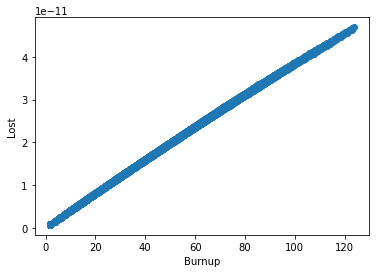

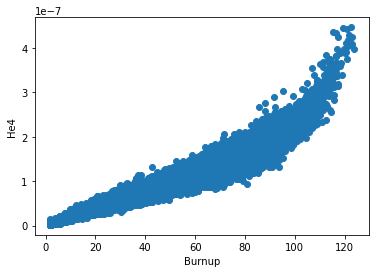

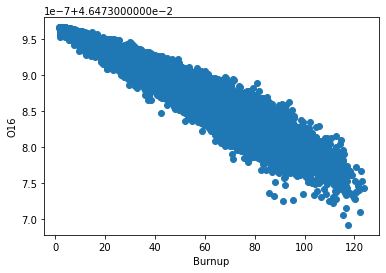

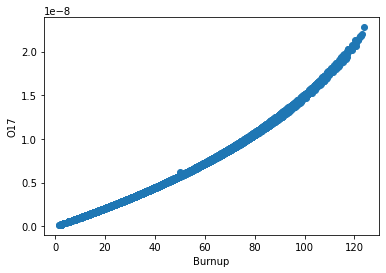

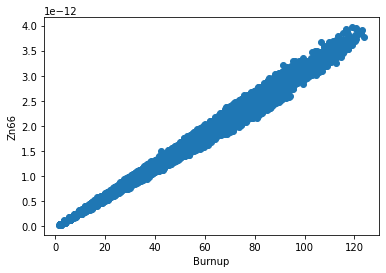

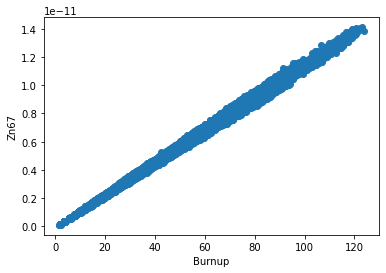

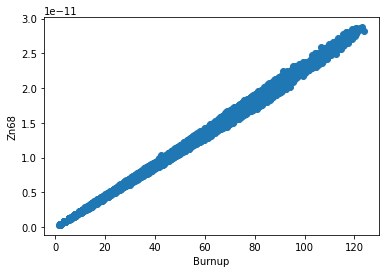

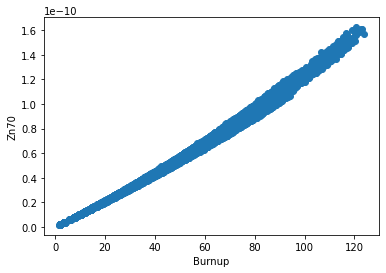

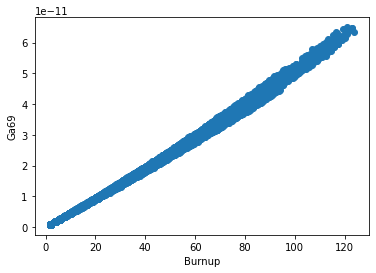

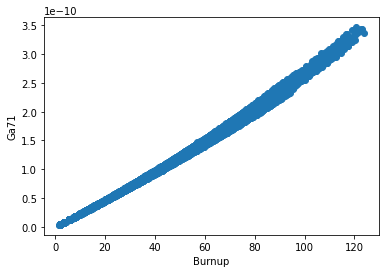

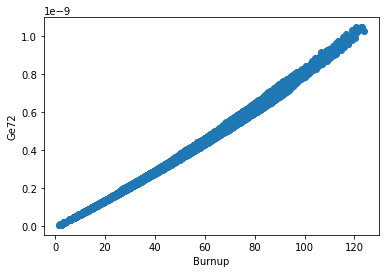

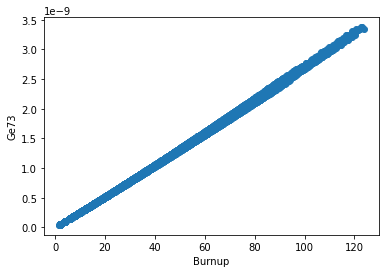

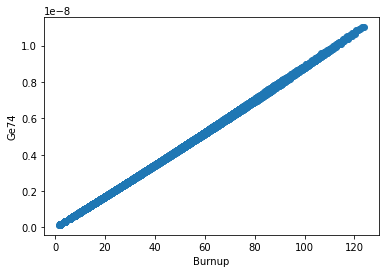

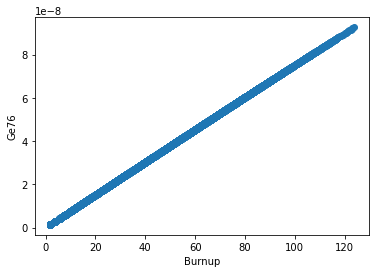

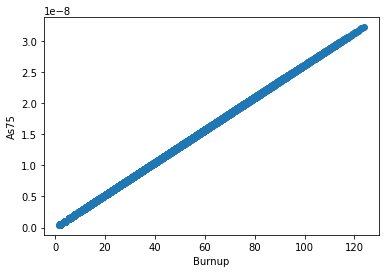

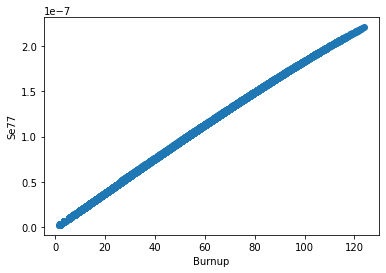

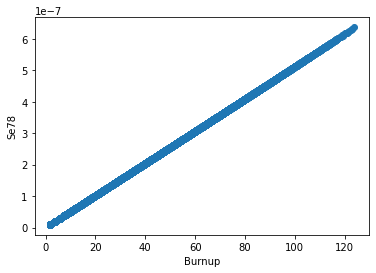

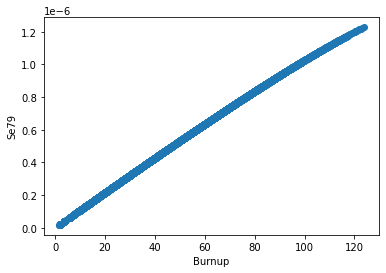

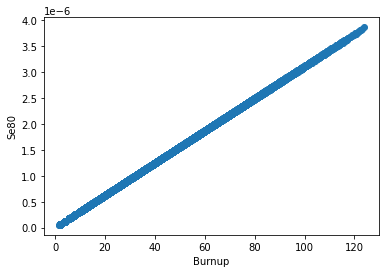

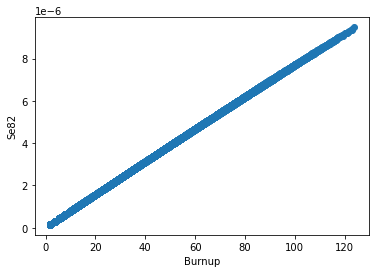

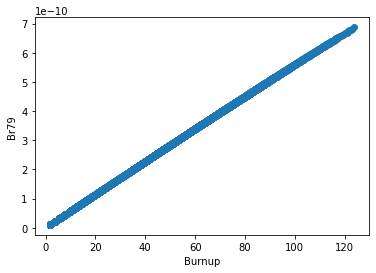

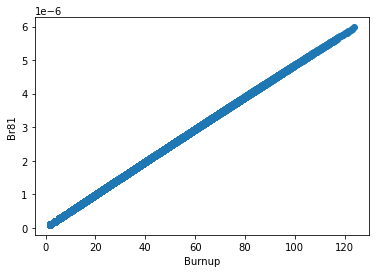

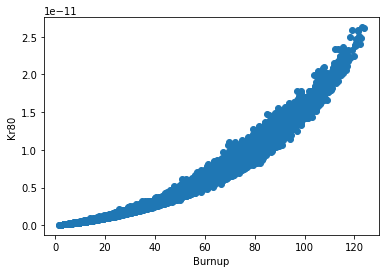

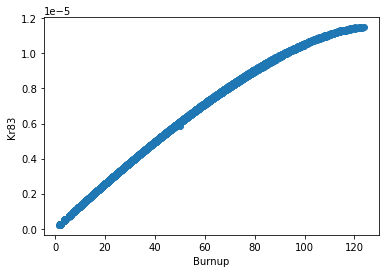

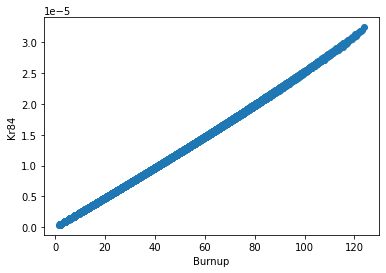

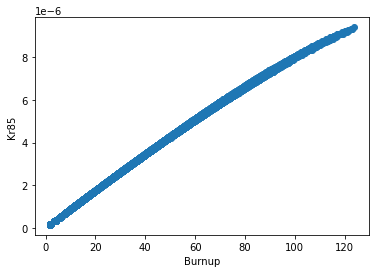

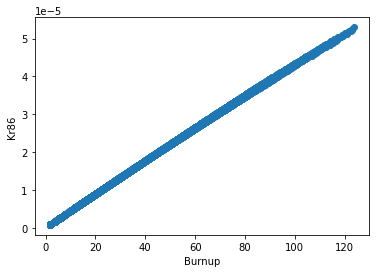

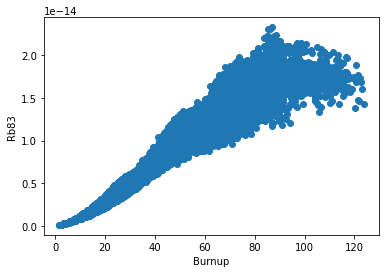

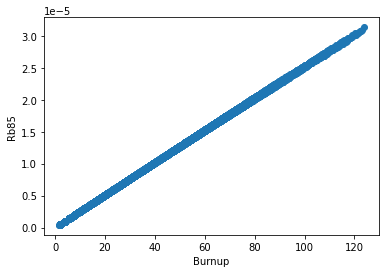

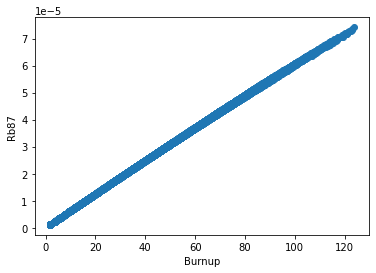

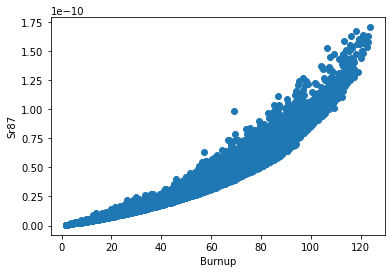

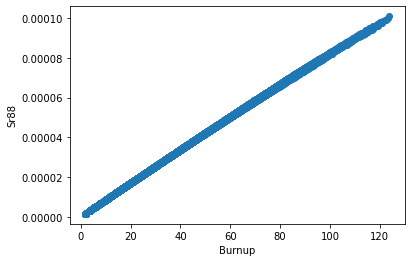

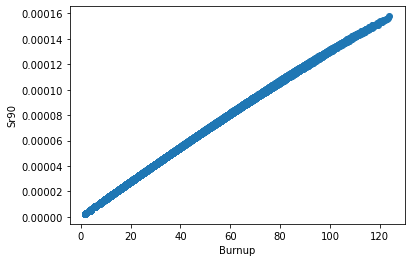

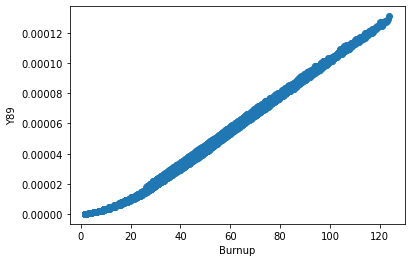

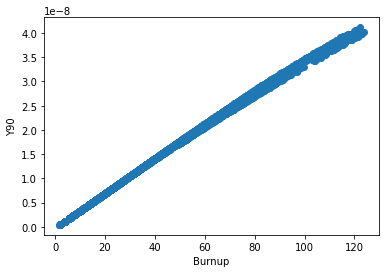

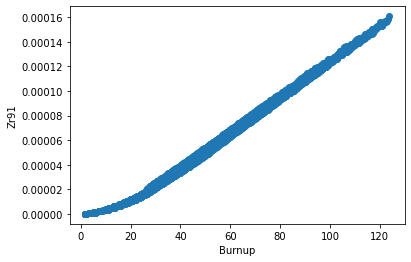

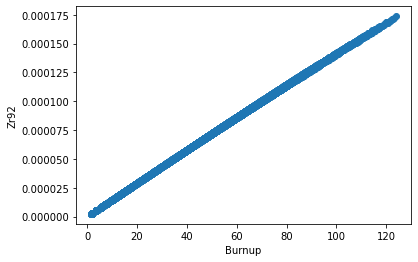

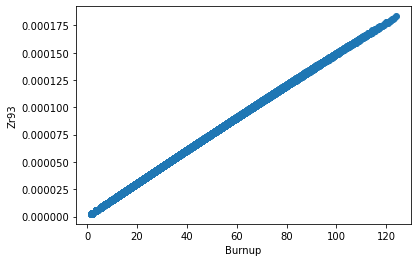

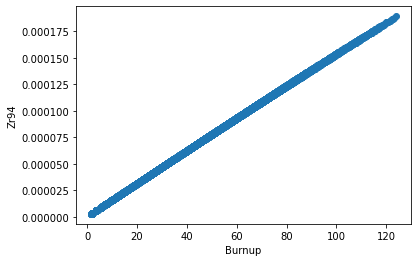

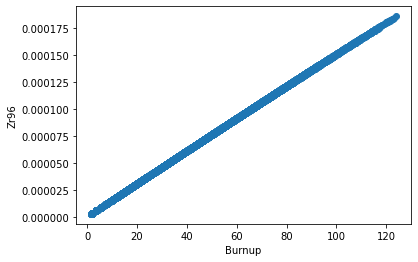

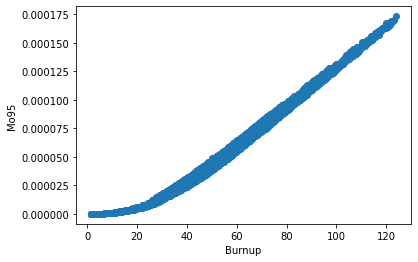

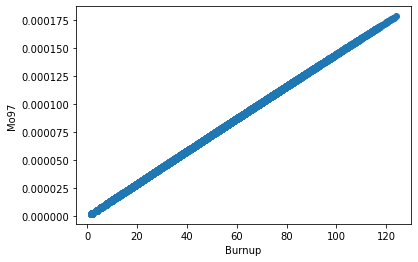

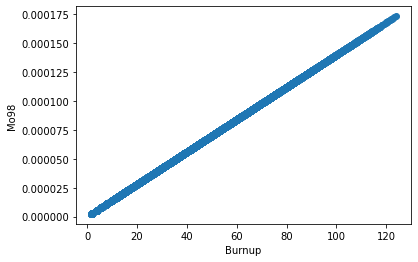

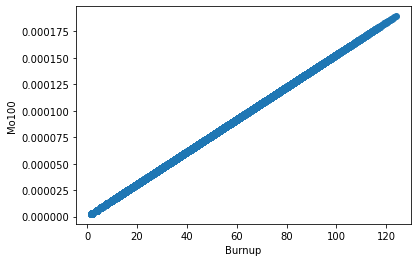

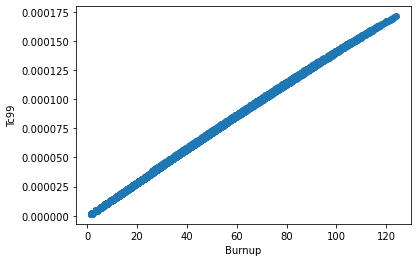

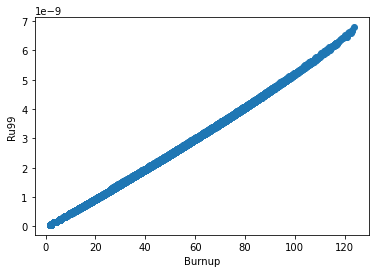

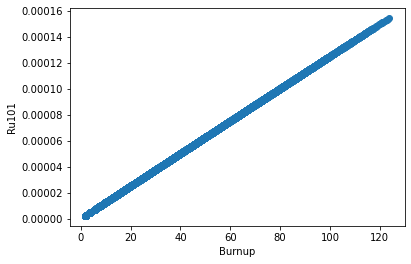

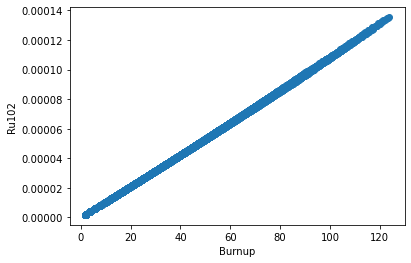

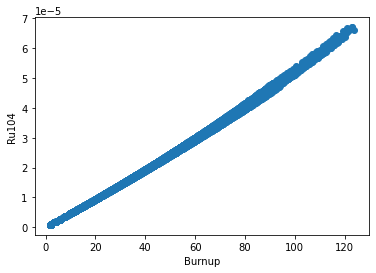

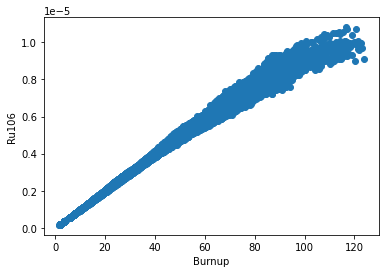

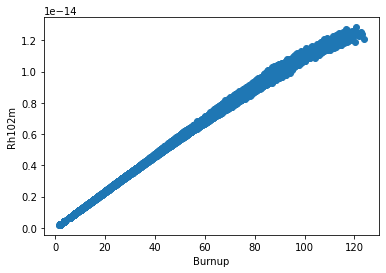

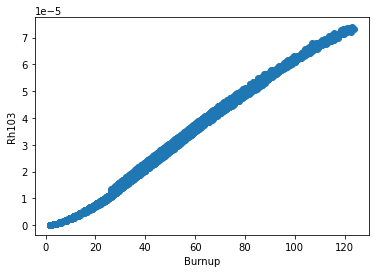

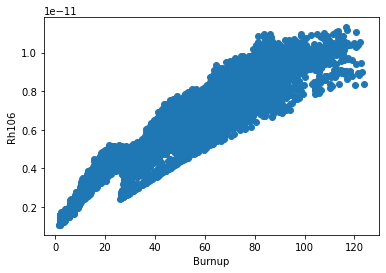

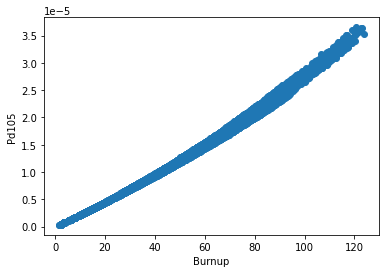

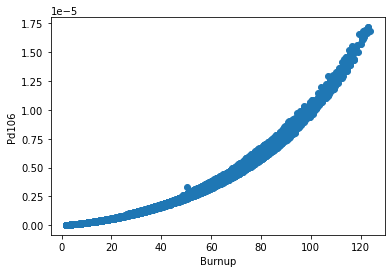

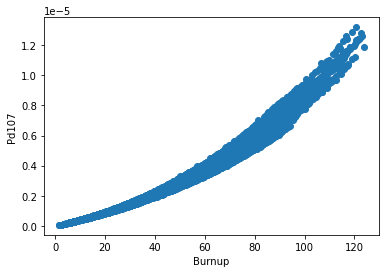

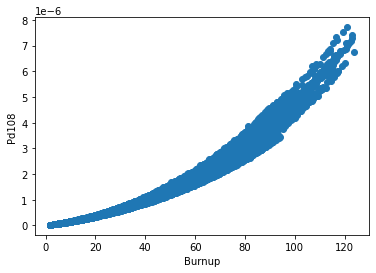

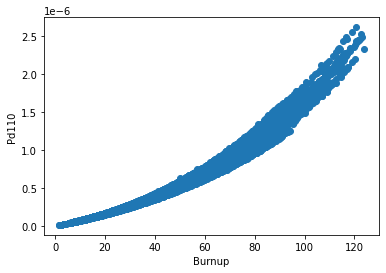

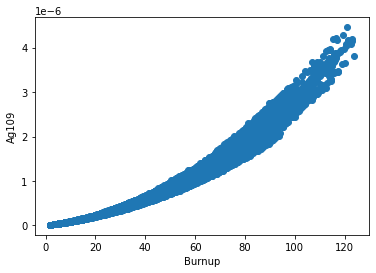

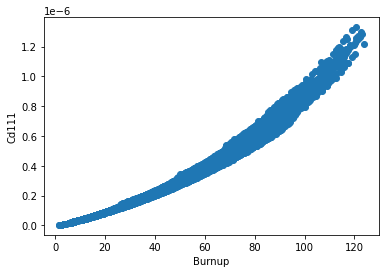

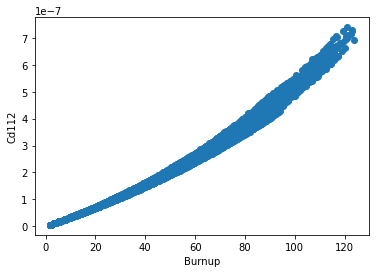

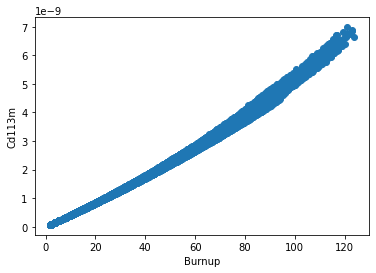

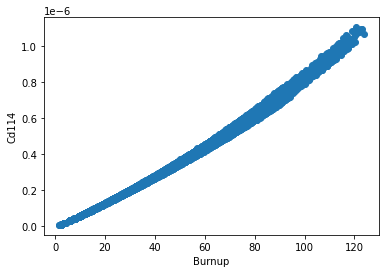

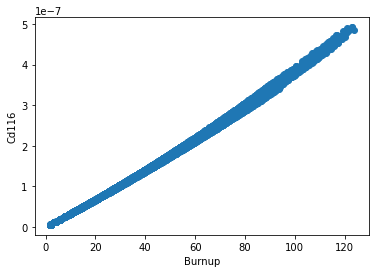

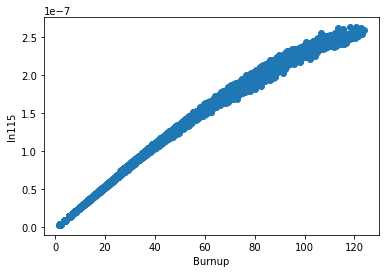

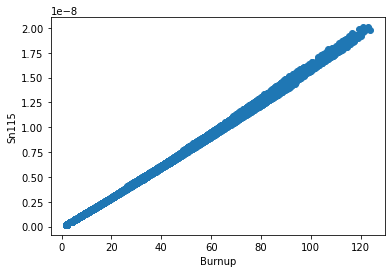

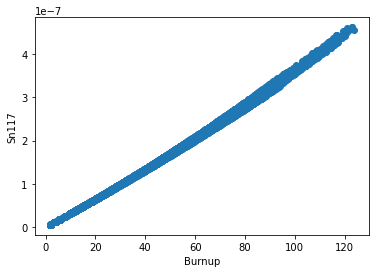

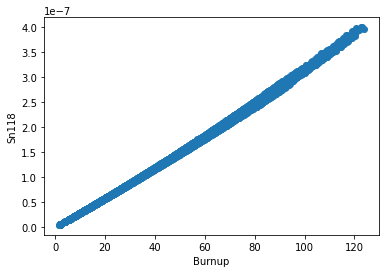

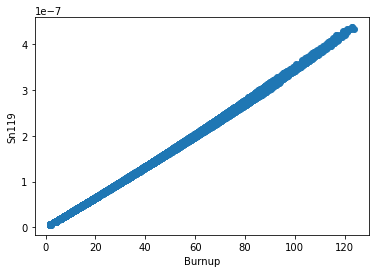

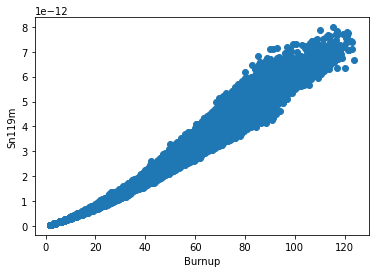

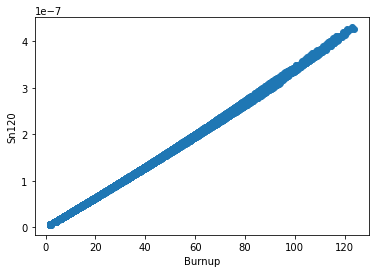

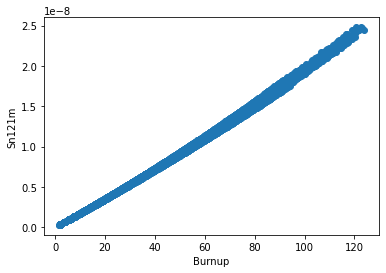

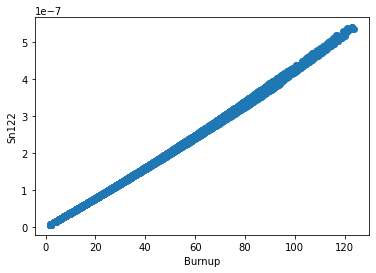

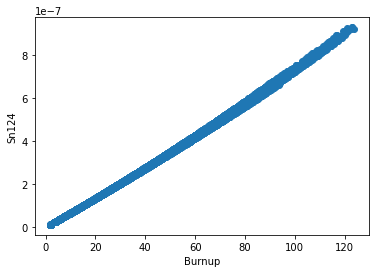

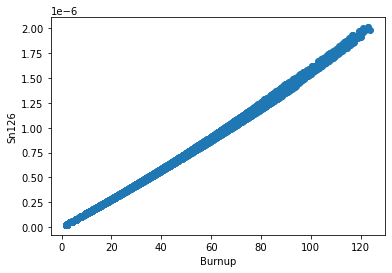

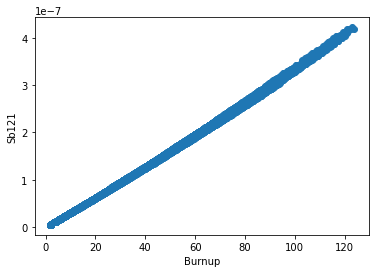

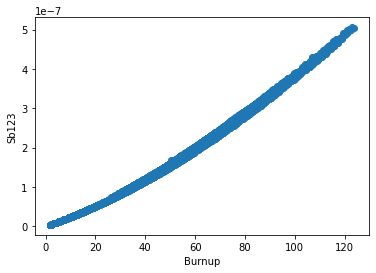

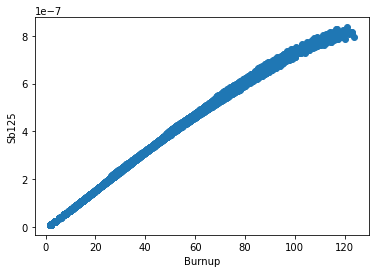

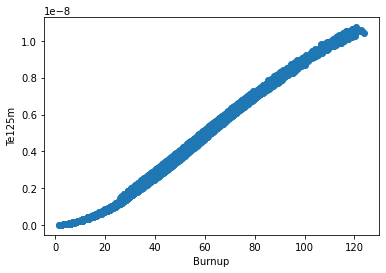

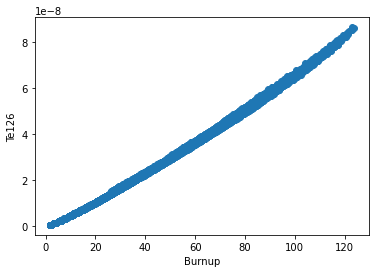

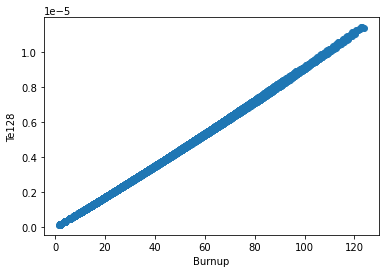

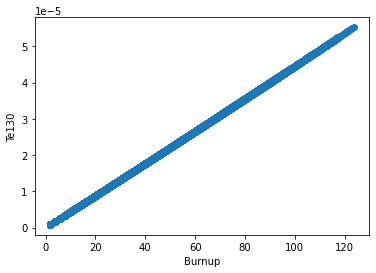

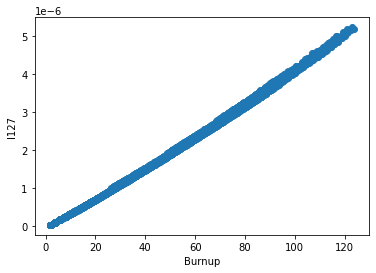

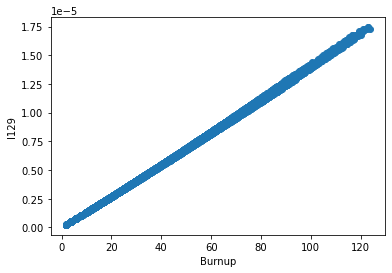

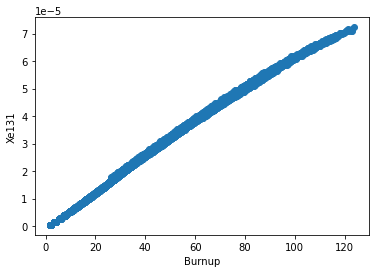

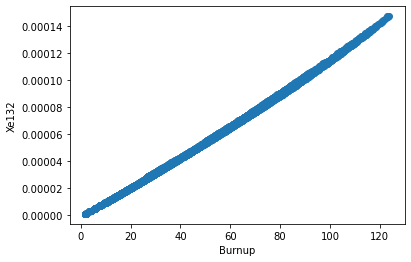

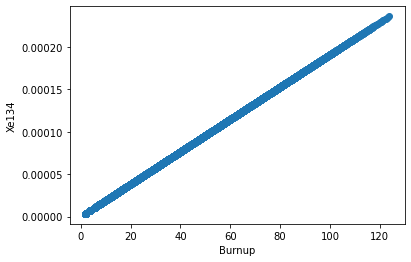

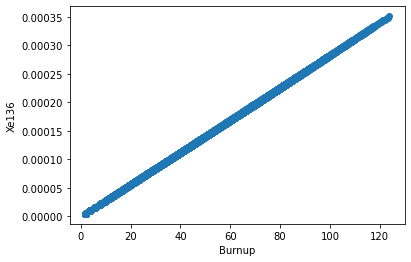

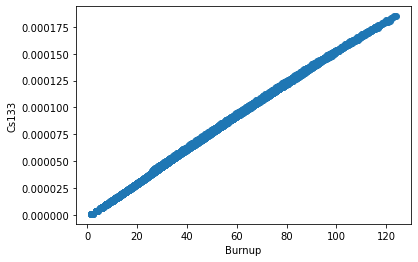

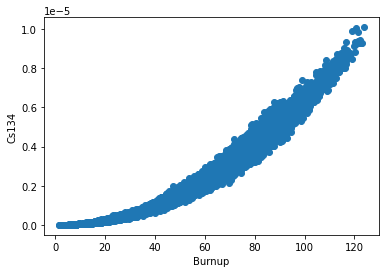

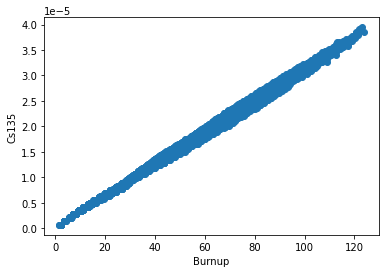

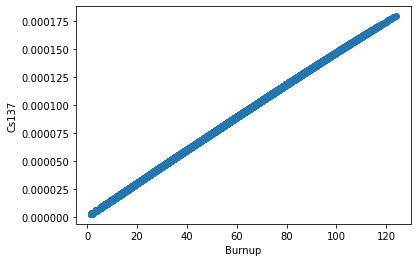

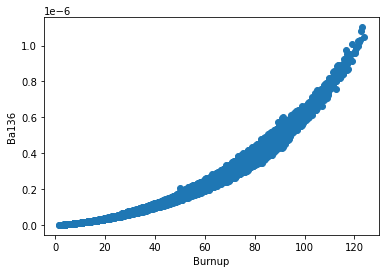

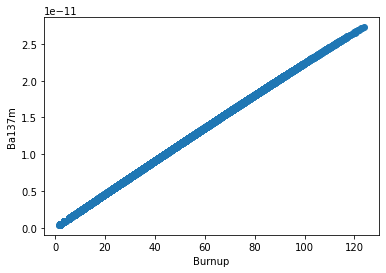

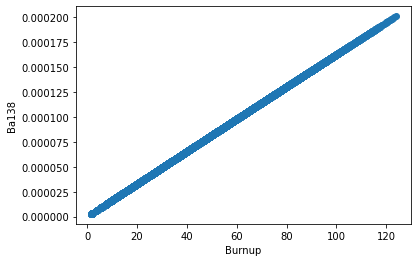

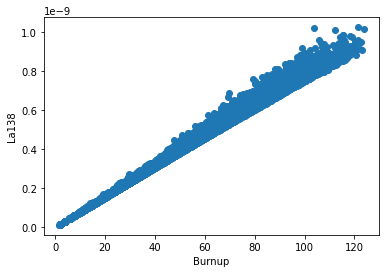

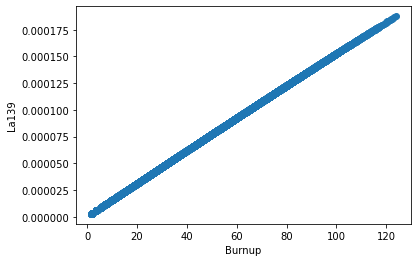

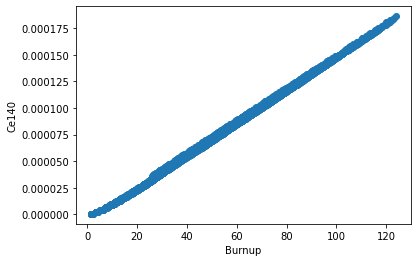

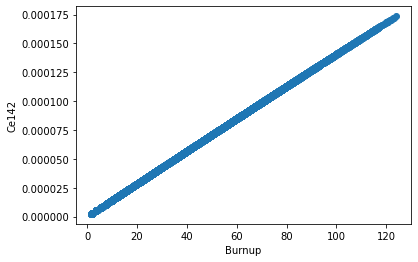

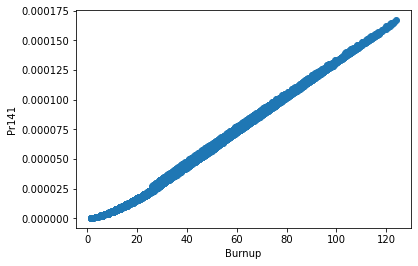

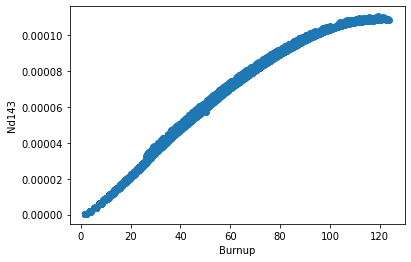

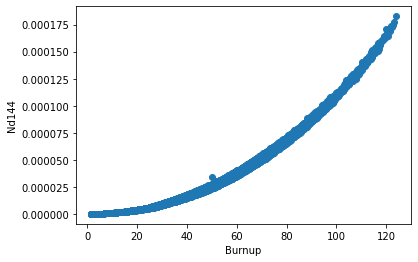

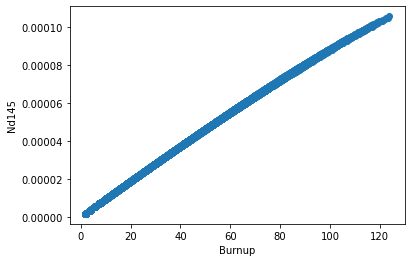

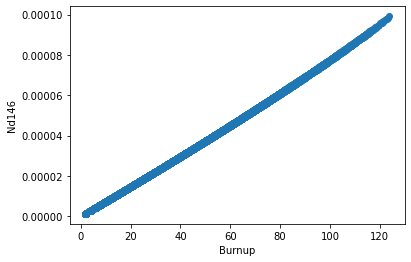

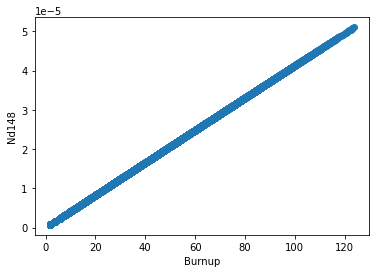

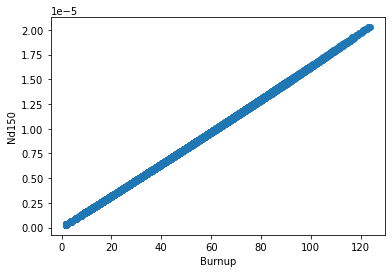

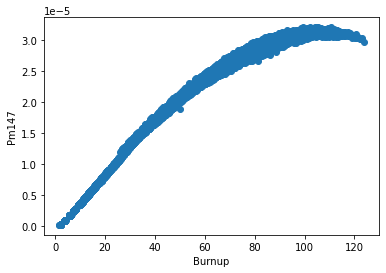

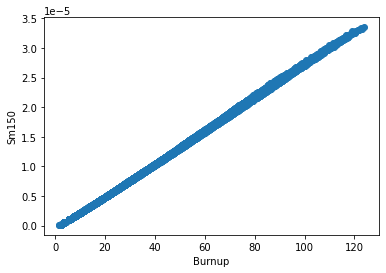

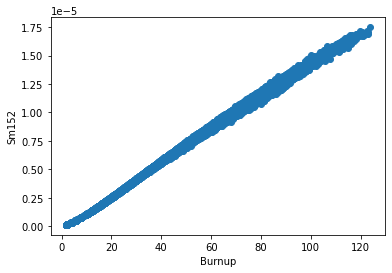

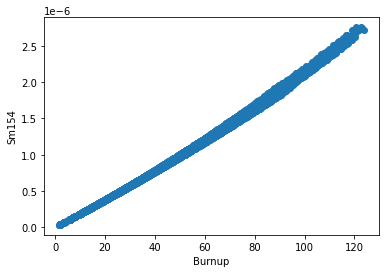

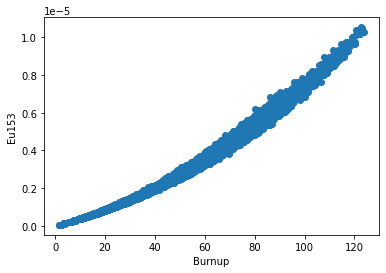

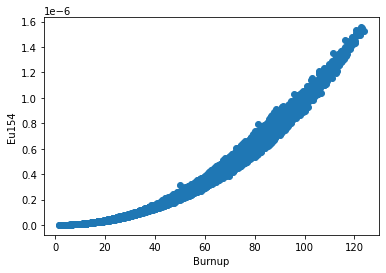

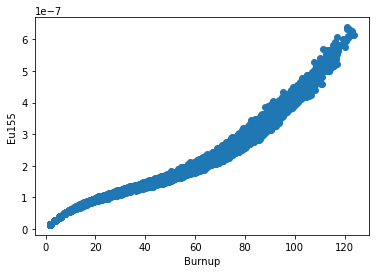

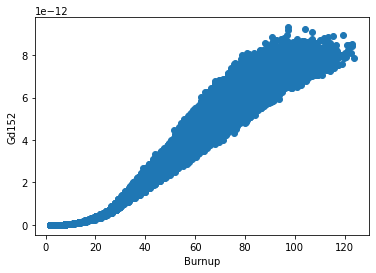

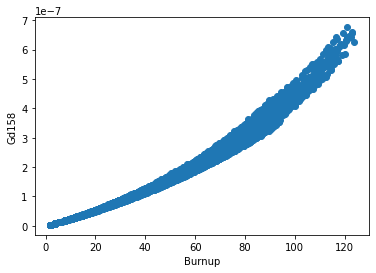

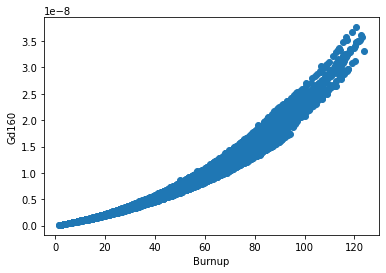

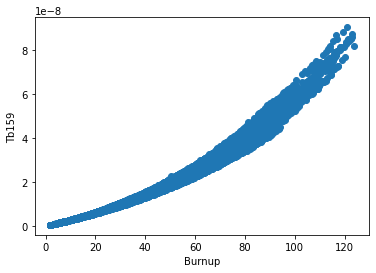

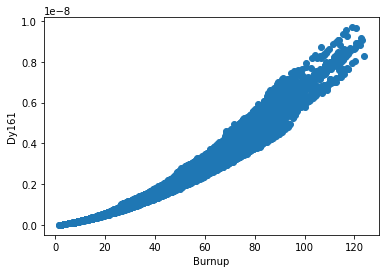

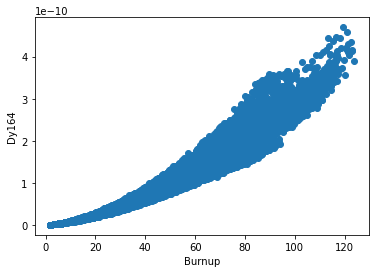

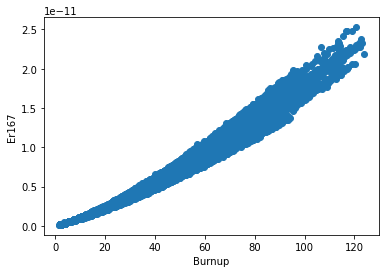

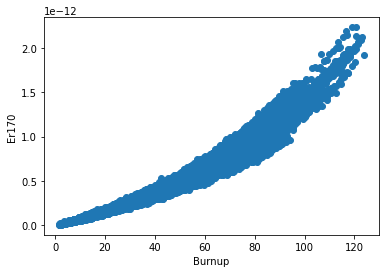

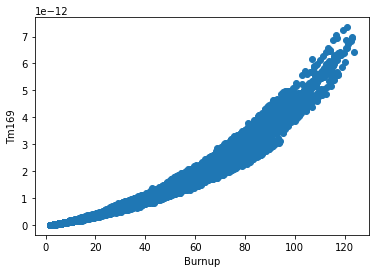

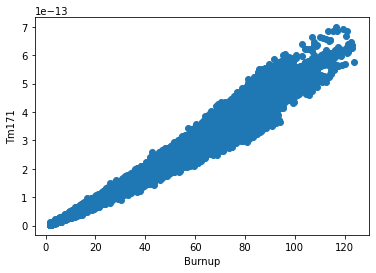

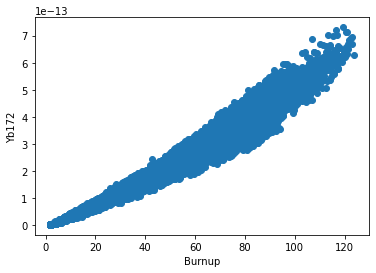

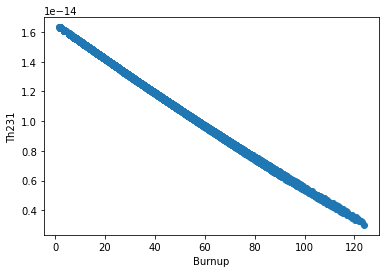

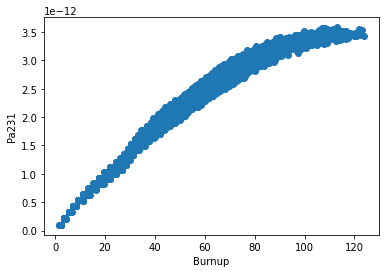

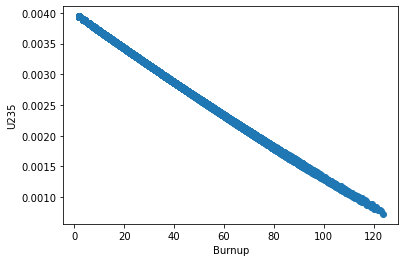

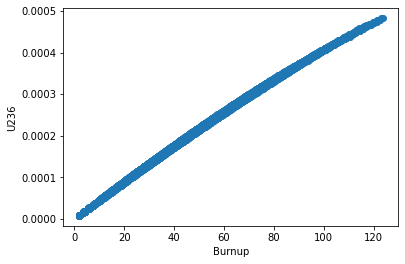

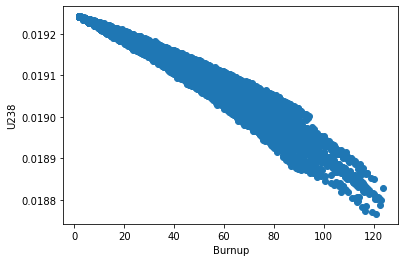

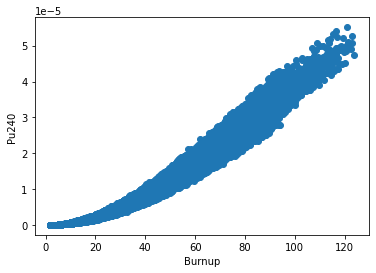

In [41]:
i = 0
for column in strong_corr.columns:
    plt.scatter(df['Burnup [MWd/kg_HM]'], strong_corr[column])
    #plt.plot(df['Burnup [MWd/kg_HM]'], strong_corr[column]*correlations[i], color='red')
    
    plt.xlabel('Burnup')
    plt.ylabel(column)
    i +=1
    plt.show()